# Importação de dados

In [ ]:
#importar as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict 

In [ ]:
#carrega o dataset
dataset = pd.read_excel('/content/drive/MyDrive/PGCIN-UFSC/PCI410068 Machine Learning e Deep Learning/bibliometrics_database.xlsx')
dataset.head(2)

,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher,Publisher City,Publisher Address,ISSN,eISSN,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,Book DOI,Early Access Date,Number of Pages,WoS Categories,Research Areas,IDS Number,UT (Unique WOS ID),Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,Unnamed: 67
0,J,"Du, CF; Cohoon, J; Lopez, P; Howison, J",NaN,NaN,NaN,"Du, Caifan; Cohoon, Johanna; Lopez, Patrice; H...",NaN,NaN,Softcite dataset: A dataset of software mentio...,JOURNAL OF THE ASSOCIATION FOR INFORMATION SCI...,NaN,NaN,English,Article; Early Access,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Software contributions to academic research ar...,"[Du, Caifan; Cohoon, Johanna; Howison, James] ...","Du, CF (corresponding author), Univ Texas Aust...",cfdu@utexas.edu,NaN,NaN,Alfred P. Sloan FoundationAlfred P. Sloan Foun...,"Alfred P. Sloan Foundation, Grant/Award Number...",NaN,62,0,0,0,0,WILEY,HOBOKEN,"111 RIVER ST, HOBOKEN 07030-5774, NJ USA",2330-1635,2330-1643,NaN,J ASSOC INF SCI TECH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1002/asi.24454,NaN,FEB 2021,15,"Computer Science, Information Systems; Informa...",Computer Science; Information Science & Librar...,QB0WM,WOS:000613863100001,NaN,NaN,NaN,NaN,2021-02-17,NaN
1,J,"Szuflita-Zurawska, M; Basinska, BA",NaN,NaN,NaN,"Szuflita-Zurawska, Magdalena; Basinska, Beata A.",NaN,NaN,Visegrad countries' scientific productivity in...,LEARNED PUBLISHING,NaN,NaN,English,Article; Early Access,NaN,NaN,NaN,NaN,NaN,scientific productivity; higher education; bib...,NaN,Measuring the growth of research productivity ...,"[Szuflita-Zurawska, Magdalena; Basinska, Beata...","Szuflita-Zurawska, M (corresponding author), G...",magdalena.szuflita@pg.edu.pl,NaN,NaN,"National Science Centre, PolandNational Scienc...",We thank all reviewers and the editor-in-chief...,NaN,43,0,0,0,0,WILEY,HOBOKEN,"111 RIVER ST, HOBOKEN 07030-5774, NJ USA",0953-1513,1741-4857,NaN,LEARN PUBL,Learn. Publ.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1002/leap.1370,NaN,FEB 2021,11,Information Science & Library Science,Information Science & Library Science,QA2TA,WOS:000613299800001,NaN,NaN,NaN,NaN,2021-02-17,NaN


# Tratamento dos dados

In [ ]:
#elimina primeiro do dataset os registros sem a data de publicação e os três outliers (+ de )
dataset = dataset.sort_values('Publication Year', ascending=0)
dataset = dataset.drop(dataset[dataset['Publication Year'].isnull()].index)
dataset = dataset.reset_index()
dataset.head(3)

,index,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,Source Title,Book Series Title,Book Series Subtitle,Language,Document Type,Conference Title,Conference Date,Conference Location,Conference Sponsor,Conference Host,Author Keywords,Keywords Plus,Abstract,Addresses,Reprint Addresses,Email Addresses,Researcher Ids,ORCIDs,Funding Orgs,Funding Text,Cited References,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publisher,Publisher City,Publisher Address,ISSN,eISSN,ISBN,Journal Abbreviation,Journal ISO Abbreviation,Publication Date,Publication Year,Volume,Issue,Part Number,Supplement,Special Issue,Meeting Abstract,Start Page,End Page,Article Number,DOI,Book DOI,Early Access Date,Number of Pages,WoS Categories,Research Areas,IDS Number,UT (Unique WOS ID),Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,Unnamed: 67
0,14,J,"Reichmann, G; Schlogl, C; Thalmann, S",NaN,NaN,NaN,"Reichmann, Gerhard; Schloegl, Christian; Thalm...",NaN,NaN,The Institute for Information Science at the U...,INFORMATION-WISSENSCHAFT UND PRAXIS,NaN,NaN,German,Article,NaN,NaN,NaN,NaN,NaN,University of Graz; Institute for Information ...,LIBRARY,The history of the Institute for Information S...,"[Reichmann, Gerhard; Schloegl, Christian; Thal...","Reichmann, G (corresponding author), Karl Fran...",gerhard.reichmann@uni-graz.at; christian.schlo...,NaN,NaN,NaN,NaN,NaN,36,0,0,0,0,WALTER DE GRUYTER GMBH,BERLIN,"GENTHINER STRASSE 13, D-10785 BERLIN, GERMANY",1434-4653,1619-4292,NaN,INFORM-WISS PRAX,Inform.-Wiss. Prax.,JAN,2021.0,72.0,1,NaN,NaN,NaN,NaN,1,9,NaN,10.1515/iwp-2020-2132,NaN,NaN,9,"Computer Science, Information Systems; Informa...",Computer Science; Information Science & Librar...,PT6MP,WOS:000608727900001,NaN,Bronze,NaN,NaN,2021-02-17,NaN
1,42,J,"Marchiori, DM; Popadiuk, S; Mainardes, EW; Rod...",NaN,NaN,NaN,"Marchiori, Danilo Magno; Popadiuk, Silvio; Mai...",NaN,NaN,Innovativeness: a bibliometric vision of the c...,SCIENTOMETRICS,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Innovativeness; Co-citations; Bibliographic co...,RESEARCH-AND-DEVELOPMENT; ENTREPRENEURIAL ORIE...,The literature on the theme of innovativeness ...,"[Marchiori, Danilo Magno; Popadiuk, Silvio; Ma...","Marchiori, DM (corresponding author), Univ Bei...",danilo.marchiori@gmail.com,"Rodrigues, Ricardo Gouveia/A-7722-2010; POPADI...","Rodrigues, Ricardo Gouveia/0000-0001-6382-5147...",NaN,NaN,NaN,140,0,0,29,29,SPRINGER,DORDRECHT,"VAN GODEWIJCKSTRAAT 30, 3311 GZ DORDRECHT, NET...",0138-9130,1588-2861,NaN,SCIENTOMETRICS,Scientometrics,JAN,2021.0,126.0,1,NaN,NaN,NaN,NaN,55,92,NaN,10.1007/s11192-020-03753-6,NaN,NOV 2020,38,"Computer Science, Interdisciplinary Applicatio...",Computer Science; Information Science & Librar...,PU7XL,WOS:000584966800001,NaN,NaN,NaN,NaN,2021-02-17,NaN
2,44,J,"Vahdati, S; Fathalla, S; Lange, C; Behrend, A;...",NaN,NaN,NaN,"Vahdati, Sahar; Fathalla, Said; Lange, Christo...",NaN,NaN,A comprehensive quality assessment framework f...,SCIENTOMETRICS,NaN,NaN,English,Article,NaN,NaN,NaN,NaN,NaN,Recommendation; Scientific events; Quality ass...,SEMANTIC PUBLISHING CHALLENGE; ARTICLES,Systematic assessment of scientific events has...,"[Vahdati, Sahar] Univ Oxford, Dept Comp Sci, O...","Vahdati, S (corresponding author), Univ Oxford...",sahar.vandati@cs.ox.ac.uk; sm_fathalla@alex-sc...,NaN,NaN,DFGGerman Research Foundation (DFG) [LA 3745/4...,Open Access funding enabled and organized by P...,NaN,48,0,0,7,7,SPRINGER,DORDRECHT,"VAN GODEWIJCKSTRAAT 30, 3311 GZ DORDRECHT, NET...",0138-9130,1588-2861,NaN,SCIENTOMETRICS,Scientometrics,JAN,2021.0,126.0,1,NaN,NaN,NaN,NaN,641,682,NaN,10.1007/s11192-020-03758-1,NaN,NOV 2020,42,"Computer Science, Interdisciplinary Applicatio...",Computer Science; Information Science & Librar...,PU7XL,WOS:000584966800002,33169040.0,"Other Gold, Green Published

In [ ]:
#a variável dependente será o número médio de citações por ano (citation count) ao invés da contagem de citações (Times Cited, All Databases)
ano = 2021 - dataset['Publication Year']
ano = ano.replace(0,1)
tc = dataset.iloc[:,32:33]
tc = tc.to_numpy()

Y = [] 
i = 0
while (i < len(ano)): 
        Y.append(tc[i]//ano[i])
        i+=1

Y = pd.DataFrame(Y)
Y.columns = ['Citation Count']
Y#.head(3)

,Citation Count
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3095,2.0
3096,1.0
3097,8.0
3098,0.0


In [ ]:
#contagem de autores e nome do autor (Author Full Names)
autores = dataset.iloc[:,6:7]

X1 = pd.DataFrame(autores['Author Full Names'].str.split(';').str.len()) #conta os autores por quantidade de ; + 1
X1.columns = ['Number of authors']
X1.head(3)


,Number of authors
0,3
1,4
2,7


In [ ]:
autores2 = autores['Author Full Names'].str.split(';', expand=True) #divide os autores em colunas
#autores2

lista = pd.Series(autores2.values.ravel('F')) #reorganiza o array em uma coluna só
lista.sort_values(0,inplace=True, ascending=True,ignore_index=True) #ordena os valores em ordem alfabética resetando o index
lista = pd.unique(lista).tolist() #remove os nomes duplicados
#lista

busca = autores2[0].tolist() #gera uma lista apenas com o primeiro autor
#busca

#armazena o index da lista de autores a partir do índice localizado na lista dos nomes dos primeiros autores
X2 = [] 
i = 0
while (i < len(busca)): 
    if (lista.count(busca[i]) > 0): 
        k = lista.index(busca[i])
        X2.append(k) 
    else:
        X2.append(None)
    i += 1

X2 = pd.DataFrame(X2)
X2.columns = ['First Author Position']
X2.head(3)



,First Author Position
0,5163
1,4833
2,5452


In [ ]:
#Número de palavras no título (Article Title)
titulos = dataset.iloc[:,9:10]
titulos


X3 = pd.DataFrame(titulos['Article Title'].str.split().str.len())
X3.columns = ['Number of title words']
X3.head(3)


,Number of title words
0,13
1,17
2,8


In [ ]:
#Número de palavras no abstract
abstract = dataset.iloc[:,22:23]
#abstract

X4 = pd.DataFrame(abstract['Abstract'].str.split().str.len()).replace(np.nan, 0)
X4.columns = ['Number of abstract words']
X4.head(3)

,Number of abstract words
0,51.0
1,220.0
2,179.0


In [ ]:
#Periódico onde foi publicado (Source Title)
lista = dataset.iloc[:,10:11]
#lista

lista = pd.Series(lista.values.ravel('F')) #garante que o array é unidimensional
lista.sort_values(0,inplace=True, ascending=True,ignore_index=True) #ordena os valores em ordem alfabética resetando o index
lista = pd.unique(lista).tolist() #remove os nomes duplicados
#lista

#obtem o índice do nome do periódico na lista de periódicos (posição em ordem alfabética)
busca = dataset.iloc[:,10:11].values#.tolist()
busca


X5 = [] 
i = 0
while (i < len(busca)): 
    if (lista.count(busca[i]) > 0): 
        k = lista.index(busca[i])
        X5.append(k) 
    else:
        X5.append(None)
    i += 1

#armazena o index da lista de autores a partir do índice localizado na lista dos nomes dos primeiros autores
X5 = pd.DataFrame(X5)
X5.columns = ['Journal']
X5#.head(3)

,Journal
0,53
1,120
2,120
3,65
4,64
...,...
3095,120
3096,69
3097,80
3098,98


In [ ]:
#Quantidade de citações realizadas (Cited Reference Count)
X6 = dataset.iloc[:,31:32]
X6.head(3)

,Cited Reference Count
0,36
1,140
2,48


In [ ]:
#Ano da publicação (Publication Year)
X7 = dataset.iloc[:,45:46]
X7 = X7.replace({np.nan: None})
X7.head(3)

,Publication Year
0,2021.0
1,2021.0
2,2021.0


In [ ]:
#É parte de número especial? (Special Issue)
X8 = dataset.iloc[:,50:51]
#X8

X8 = pd.Series(X8['Special Issue']).str.replace('SI', '1').replace(np.nan, 0)
X8.columns = ['Special Issue']

X8.head(3)

0    0
1    0
2    0
Name: Special Issue, dtype: object

In [ ]:
#Contagem de páginas (Number of Pages)
X9 = dataset.iloc[:,58:59]
X9.head(3)

,Number of Pages
0,9
1,38
2,42


In [ ]:
#juntar as variáveis independentes em um só dataset
X = pd.concat([X1,X2,X3,X4,X5,X6,X7,X8,X9], axis=1)
#X = X.reset_index()
#X.sort_values('Publication Year',inplace=True, ascending=False,ignore_index=True)
X.head(3)
#X.to_csv('/content/drive/MyDrive/PGCIN-UFSC/PCI410068 Machine Learning e Deep Learning/dados_predicao_exportados_colab.csv') 

,Number of authors,First Author Position,Number of title words,Number of abstract words,Journal,Cited Reference Count,Publication Year,Special Issue,Number of Pages
0,3,5163,13,51.0,53,36,2021.0,0,9
1,4,4833,17,220.0,120,140,2021.0,0,38
2,7,5452,8,179.0,120,48,2021.0,0,42


In [ ]:
#converte em arrays
type(X) #retorna o tipo
X = X.values
Y = Y.values
type(X) #retorna o tipo, agora array

numpy.ndarray

In [ ]:
#cria primeiro uma estratificação das citações por quartis para os modelos por classificação

#quartil	inicio	fim
#Q1	    0	      2
#Q2	    2	      11,5
#Q3	    11,5	  31,25
#Q4	    31,25	  1376

Q = [] 
i = 0
while (i < len(Y)): 
        if Y[i] >= 0 and Y[i] < 2: 
          Q.append('1') #Q1
        elif Y[i] >= 2 and Y[i] < 12:
          Q.append('2') #Q2
        elif Y[i] >= 12 and Y[i] < 31:
          Q.append('3') #Q3
        elif Y[i] >= 31:
          Q.append('4') #Q4
        i+=1

Q = pd.DataFrame(Q).astype({0: 'int32'})
Q.columns = ['Citation Count Quartile']
Q#.head(3)
Q.value_counts()
Q = Q.values

In [ ]:
#np.any(np.isnan(X4))
#np.isfinite(X4.all())

# Exploração dos dados

In [ ]:
Xex = pd.concat([X1,X2,X3,X4,X5,X6,X7,X8,X9], axis=1)
Xex.describe()

,Number of authors,First Author Position,Number of title words,Number of abstract words,Journal,Cited Reference Count,Publication Year,Number of Pages
count,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000
mean,2.705484,4668.060000,12.654516,181.961613,91.534839,39.638387,2015.857742,15.908710
std,1.473232,605.009228,4.545528,68.576068,35.143459,32.820120,2.963490,7.235029
min,1.000000,3680.000000,2.000000,0.000000,0.000000,0.000000,2010.000000,2.000000
25%,2.000000,4152.000000,9.000000,139.000000,71.000000,21.000000,2014.000000,11.000000
50%,2.000000,4642.500000,12.000000,179.000000,110.000000,33.000000,2016.000000,15.000000
75%,3.000000,5195.250000,15.000000,220.000000,120.000000,49.000000,2018.000000,20.000000
max,19.000000,5733.000000,42.000000,1283.000000,134.000000,900.000000,2021.000000,62.000000


In [ ]:
Yex = pd.DataFrame(Y, columns = ['Citation count'])
Yex.describe()

,Citation count
count,3100.000000
mean,2.014194
std,6.389816
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,196.000000


In [ ]:
Xex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Number of authors         3100 non-null   int64  
 1   First Author Position     3100 non-null   int64  
 2   Number of title words     3100 non-null   int64  
 3   Number of abstract words  3100 non-null   float64
 4   Journal                   3100 non-null   int64  
 5   Cited Reference Count     3100 non-null   int64  
 6   Publication Year          3100 non-null   float64
 7   Special Issue             3100 non-null   object 
 8   Number of Pages           3100 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 218.1+ KB


In [ ]:
Yex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Citation count  3100 non-null   float64
dtypes: float64(1)
memory usage: 24.3 KB


In [ ]:
allvar = pd.concat([Yex,X1,X2,X3,X4,X5,X6,X7,X8,X9], axis=1)
allvar.corr('pearson')

,Citation count,Number of authors,First Author Position,Number of title words,Number of abstract words,Journal,Cited Reference Count,Publication Year,Number of Pages
Citation count,1.000000,0.021628,-0.004823,-0.021884,-0.023048,0.059462,0.088688,-0.118343,0.059874
Number of authors,0.021628,1.000000,0.033272,0.034866,0.070335,0.105518,0.057533,0.054702,0.126595
First Author Position,-0.004823,0.033272,1.000000,-0.036338,0.002829,0.013954,-0.015571,0.014763,0.005135
Number of title words,-0.021884,0.034866,-0.036338,1.000000,0.145817,0.015426,0.025771,0.047997,0.068941
Number of abstract words,-0.023048,0.070335,0.002829,0.145817,1.000000,-0.008438,0.056950,0.168921,0.195534
Journal,0.059462,0.105518,0.013954,0.015426,-0.008438,1.000000,0.022115,-0.110361,0.140715
Cited Reference Count,0.088688,0.057533,-0.015571,0.025771,0.056950,0.022115,1.000000,0.089549,0.496233
Publication Year,-0.118343,0.054702,0.014763,0.047997,0.168921,-0.110361,0.089549,1.000000,0.140307
Number of Pages,0.059874,0.126595,0.005135,0.068941,0.195534,0.140715,0.496233,0.140307,1.000000


In [ ]:
allvar.corr('spearman')

,Citation count,Number of authors,First Author Position,Number of title words,Number of abstract words,Journal,Cited Reference Count,Publication Year,Number of Pages
Citation count,1.000000,0.069732,-0.026024,-0.024094,0.010751,0.196305,0.258497,-0.236374,0.103320
Number of authors,0.069732,1.000000,0.020715,0.053623,0.082010,0.115941,0.116104,0.050777,0.157067
First Author Position,-0.026024,0.020715,1.000000,-0.022578,0.016098,0.021739,0.004378,0.020375,0.019510
Number of title words,-0.024094,0.053623,-0.022578,1.000000,0.156778,0.010977,0.047502,0.046966,0.097320
Number of abstract words,0.010751,0.082010,0.016098,0.156778,1.000000,0.033851,0.188935,0.175726,0.253979
Journal,0.196305,0.115941,0.021739,0.010977,0.033851,1.000000,0.063136,-0.086618,0.204742
Cited Reference Count,0.258497,0.116104,0.004378,0.047502,0.188935,0.063136,1.000000,0.116581,0.502521
Publication Year,-0.236374,0.050777,0.020375,0.046966,0.175726,-0.086618,0.116581,1.000000,0.135830
Number of Pages,0.103320,0.157067,0.019510,0.097320,0.253979,0.204742,0.502521,0.135830,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Number of authors
0,3
1,4
2,7
3,3
4,4
...,...
3095,4
3096,2
3097,3
3098,3


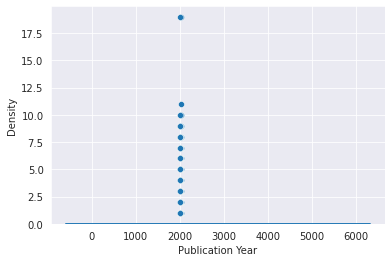

In [ ]:
import seaborn as sns   
sns.set_style('darkgrid')
sns.distplot(Xex)
sns.scatterplot(data=allvar, x="Publication Year", y="Number of authors")
X1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


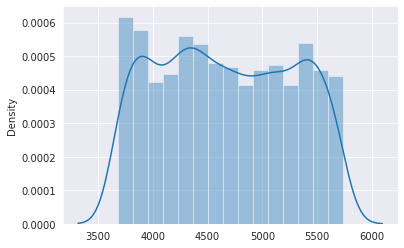

In [ ]:
#First Author Position
sns.distplot(X2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


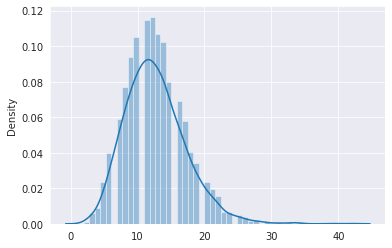

In [ ]:
#Number of title words
sns.distplot(X3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


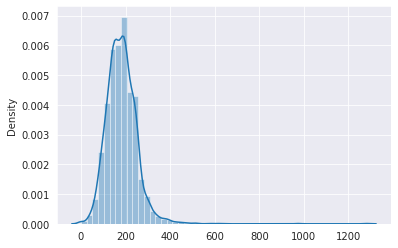

In [ ]:
#Number of abstract words
sns.distplot(X4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


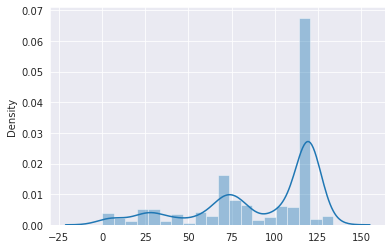

In [ ]:
#Journal
sns.distplot(X5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


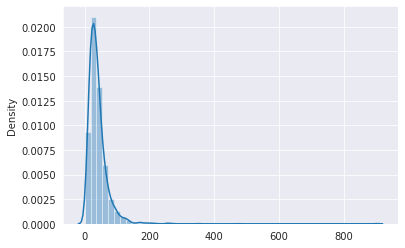

In [ ]:
#Cited Reference Count
sns.distplot(X6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


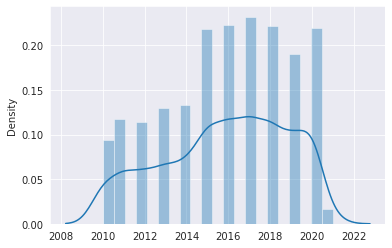

In [ ]:
#Publication Year
sns.distplot(X7)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


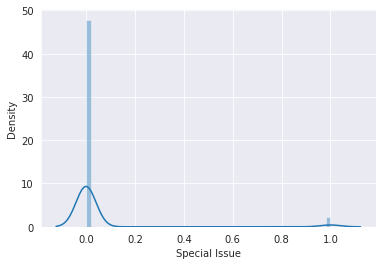

In [ ]:
#Special Issue
sns.distplot(X8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


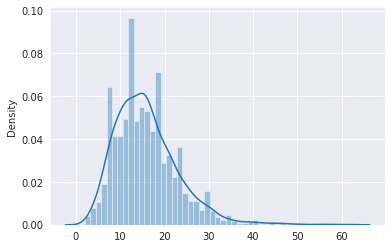

In [ ]:
#Number of Pages
sns.distplot(X9)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


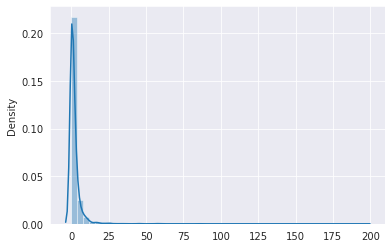

In [ ]:
#Citation count
sns.distplot(Y)

# Predição por Regressão Linear Multivariada

In [ ]:
#separa as bases de treinamento e teste
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1) #80% para treino e 20% para testes com amostra aleatória
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.34, random_state = 1) #34% para testes com amostra dos anos de 2018 até 2021

In [ ]:
#treina a base de dados
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#imprime coeficiente e intercepto
regressor.coef_, regressor.intercept_

(array([[ 8.13833606e-02,  4.12811714e-05, -1.45192502e-02,
         -1.36064842e-03,  7.50202485e-03,  2.09894721e-02,
         -2.78107086e-01, -4.72825963e-01,  2.77739273e-02]]),
 array([560.76318713]))

In [ ]:
#testar o modelo predizendo valores a partir da base de testes
y_pred = regressor.predict(x_test)
#y_pred

In [ ]:
#verifica a acurácia do modelo com o r2
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

-0.0008155365639610501


In [ ]:
#verifica o score de variância
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_test, y_pred))

0.0018274703460295916


#Predição por Regressão Polinomial

In [ ]:
#separa as bases de treinamento e teste
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 1) #80% para treino e 20% para testes com amostra aleatória

In [ ]:
#transforma os valores em função polinomial h(θ)=θ0 + θ1X^1 + θ2X^2 + θ3X^3 .... e treina o modelo
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

x_poly = poly.fit_transform(x_train)
#x_poly

In [ ]:
#imprime coeficiente e intercepto
regressor.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#testar o modelo predizendo valores a partir da base de testes
x_test_poly = poly.fit_transform(x_test)
y_pred = regressor.predict(x_test_poly)


In [ ]:
#TODO: como avaliar acurácia da regressão polinomial? r2 não faz sentido já que não é uma reta. Não consegui descobrir.
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(rmse)
print(r2)

9.137527048294922
-3.1393780952712156


#Predição com Regressão Logística

In [ ]:
#recria X e Y (teste)
X = Xex #pd.concat([X1,X2,X3,X4,X5,X6,X7,X8,X9], axis=1)
Y = Yex


In [ ]:
#separa as bases de treinamento e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Q, test_size=0.2, random_state = 1) #20% para testes com amostra aleatória

In [ ]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#treina os dados para classificação com regressão logística
from sklearn.linear_model import LogisticRegression
logclassifier = LogisticRegression(random_state=0,max_iter=500)
logclassifier.fit(x_train, y_train.ravel())#.values.ravel())
y_pred_log = logclassifier.predict(x_test)

In [ ]:
#agora com SVM
from sklearn.svm import SVC
svmclassifier = SVC(kernel = 'rbf', random_state = 0)
svmclassifier.fit(x_train, y_train.ravel())#.values.ravel())
y_pred_svm = svmclassifier.predict(x_test)

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix
cmlog = confusion_matrix(y_test, y_pred_log)

from sklearn.metrics import confusion_matrix
cmsvm = confusion_matrix(y_test, y_pred_svm)

In [ ]:
#acurácia com regressão logística/svm
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_log))
print(accuracy_score(y_test, y_pred_svm))

0.6596774193548387
0.6709677419354839


In [ ]:
#recall com regressão logística/svm
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred_log, average=None))
print(recall_score(y_test, y_pred_svm, average=None))

[0.93414634 0.13       0.         0.        ]
[0.96341463 0.105      0.         0.        ]


In [ ]:
#precisão com decision tree
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred_log, average=None))
print(precision_score(y_test, y_pred_svm, average=None))

[0.67787611 0.48148148 0.         0.        ]
[0.68103448 0.525      0.         0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#f-score com decision tree
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_log, average=None))
print(f1_score(y_test, y_pred_svm, average=None))

[0.78564103 0.20472441 0.         0.        ]
[0.7979798 0.175     0.        0.       ]


In [ ]:
#faz relatório completo
from sklearn.metrics import classification_report
target_names = ['Q1', 'Q2', 'Q3', 'Q4']
print(classification_report(y_test, y_pred_log, target_names=target_names))
print(classification_report(y_test, y_pred_svm, target_names=target_names))

              precision    recall  f1-score   support

          Q1       0.68      0.93      0.79       410
          Q2       0.48      0.13      0.20       200
          Q3       0.00      0.00      0.00         9
          Q4       0.00      0.00      0.00         1

    accuracy                           0.66       620
   macro avg       0.29      0.27      0.25       620
weighted avg       0.60      0.66      0.59       620

              precision    recall  f1-score   support

          Q1       0.68      0.96      0.80       410
          Q2       0.53      0.10      0.17       200
          Q3       0.00      0.00      0.00         9
          Q4       0.00      0.00      0.00         1

    accuracy                           0.67       620
   macro avg       0.30      0.27      0.24       620
weighted avg       0.62      0.67      0.58       620



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Predição com Decision Tree

In [ ]:
#pd.crosstab(index=allvar['Citation count'], columns='count', )
#allvar.to_csv('/content/drive/MyDrive/PGCIN-UFSC/PCI410068 Machine Learning e Deep Learning/dados_predicao_exportados_colab_antes_dt.csv') 

In [ ]:
#recria X e Y (teste)
X = Xex
#Xdt = pd.concat([X1,X2,X3,X4,X5,X6,X7,X8,X9], axis=1)
Y = Yex.values

In [ ]:
#separa as bases de treinamento e teste
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, Q, test_size=0.2, random_state = 1) #80% para treino e 20% para testes com amostra aleatória

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 1)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
#qual será o valor para uma pessoa na posição 6.5?
y_pred = regressor.predict(x_test)
y_pred

array([1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 1., 2.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2.,
       1., 1., 1., 1., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 2., 4., 1., 2., 2., 1., 1.,
       2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2.,
       2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 3., 2., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 2., 2., 1., 2.,
       1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1.,
       2., 1., 2., 1., 1., 3., 1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1.,
       2., 1., 2., 1., 2.

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix
cmlog = confusion_matrix(y_test, y_pred)
cmlog

array([[287, 114,   7,   2],
       [108,  82,   8,   2],
       [  2,   5,   2,   0],
       [  0,   1,   0,   0]])

In [ ]:
#acurácia com decision tree
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5983870967741935

In [ ]:
#recall com decision tree
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([0.7       , 0.41      , 0.22222222, 0.        ])

In [ ]:
#precisão com decision tree
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.72292191, 0.40594059, 0.11764706, 0.        ])

In [ ]:
#f-score com decision tree
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.71127633, 0.4079602 , 0.15384615, 0.        ])

In [ ]:
#faz relatório completo
from sklearn.metrics import classification_report
target_names = ['Q1', 'Q2', 'Q3', 'Q4']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          Q1       0.72      0.70      0.71       410
          Q2       0.41      0.41      0.41       200
          Q3       0.12      0.22      0.15         9
          Q4       0.00      0.00      0.00         1

    accuracy                           0.60       620
   macro avg       0.31      0.33      0.32       620
weighted avg       0.61      0.60      0.60       620



[Text(334.8, 543.6, 'Journal <= 68.5\nmse = 0.293\nsamples = 2480\nvalue = 1.366'),
 Text(167.4, 326.16, 'Number of Pages <= 43.5\nmse = 0.103\nsamples = 506\nvalue = 1.107'),
 Text(83.7, 108.72000000000003, '\n  (...)  \n'),
 Text(251.10000000000002, 108.72000000000003, '\n  (...)  \n'),
 Text(502.20000000000005, 326.16, 'Cited Reference Count <= 35.5\nmse = 0.32\nsamples = 1974\nvalue = 1.432'),
 Text(418.5, 108.72000000000003, '\n  (...)  \n'),
 Text(585.9, 108.72000000000003, '\n  (...)  \n')]

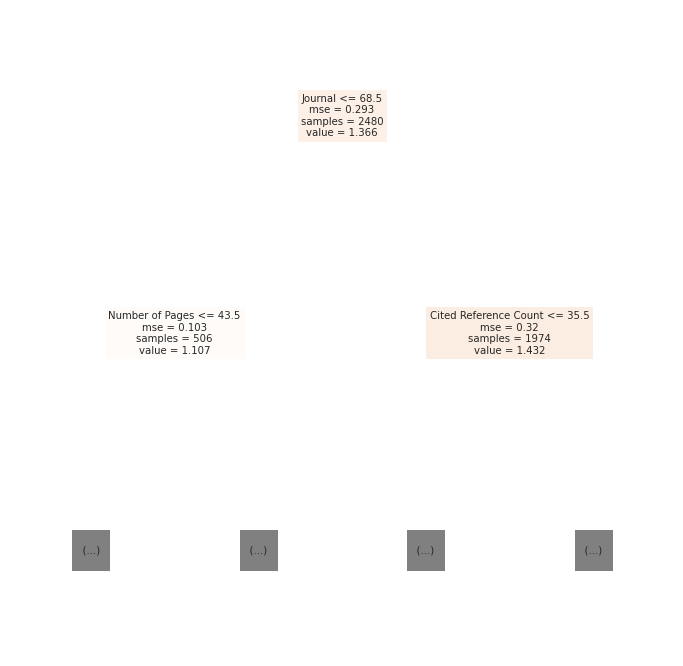

In [ ]:
from sklearn import tree

fnames = ['Number of authors','First Author Position','Number of title words', 'Number of abstract words', 'Journal', 'Cited Reference Count', 'Publication Year', 'Special Issue', 'Number of Pages']
target_names = ['Q1', 'Q2', 'Q3', 'Q4']

plt.figure(figsize=(12,12))
tree.plot_tree(regressor, feature_names=fnames, class_names=target_names, filled=True, max_depth=1)

#of = '/content/drive/MyDrive/PGCIN-UFSC/PCI410068 Machine Learning e Deep Learning/decistion_tree.png'
#tree.export_graphviz(regressor, feature_names=fnames, class_names=target_names, filled=True, max_depth=3, out_file=of)

#TODO: descobrir como exportar com tamanho legível

##Fim